# computing HMP on Young subjects data 
This notebook will :
 1) **load the MNE epochs to HMP**
 2) **Normalize & apply dimensionality reduction**
 3) **fit the data to HMP (3.1 cumulative fitting, 3.2 eliminative fitting, 3.3)**
   
Requirments:
- **HMP package**
- **preprocessed MNE epochs** 

## 1) import the MNE epochs to HMP

In [ ]:
import sys
import os
import numpy as np
import mne
import pickle
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))# Add the parent directory to the path
from config import data_dir
import hmp

young_adults_ids = [303, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319]
# Recovering subject files paths
subj_files = [os.path.join(data_dir,'prehmp', f'S{id}_epochs_preHMP.fif') for id in young_adults_ids]  # Create a list of files with full paths
sfreq = 256 
young_adults_ids_str = [str(id) for id in young_adults_ids] # subjects names
epoch_data = hmp.io.read_mne_data(subj_files, sfreq=sfreq, data_format='epochs',
                            lower_limit_rt=0.4, upper_limit_rt=2, # the function will filter out trials with RTs outside this range
                            rt_col = 'RT_Correct_CorrPU', scale = 1000, #In this case the rts are contained in the metadata of mne epoch in column "RT_Correct_CorrPU" and is in milliseconds
                            verbose=False, subj_name = young_adults_ids_str)#Turning verbose off for the documentation but it is recommended to leave it on as some output from MNE might be useful

Processing participant c:\Users\gmoha\Downloads\git\EEG_preprocess\Data\prehmp\S303_epochs_preHMP.fif's epochs eeg


c:\Users\gmoha\anaconda3\envs\BCLenv\lib\site-packages\hmp\io.py:280: RuntimeWarning: This filename (c:\Users\gmoha\Downloads\git\EEG_preprocess\Data\prehmp\S303_epochs_preHMP.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(participant, preload=True, verbose=verbose)


88 trials were retained for participant c:\Users\gmoha\Downloads\git\EEG_preprocess\Data\prehmp\S303_epochs_preHMP.fif
Processing participant c:\Users\gmoha\Downloads\git\EEG_preprocess\Data\prehmp\S305_epochs_preHMP.fif's epochs eeg
72 trials were retained for participant c:\Users\gmoha\Downloads\git\EEG_preprocess\Data\prehmp\S305_epochs_preHMP.fif
Processing participant c:\Users\gmoha\Downloads\git\EEG_preprocess\Data\prehmp\S306_epochs_preHMP.fif's epochs eeg


c:\Users\gmoha\anaconda3\envs\BCLenv\lib\site-packages\hmp\io.py:280: RuntimeWarning: This filename (c:\Users\gmoha\Downloads\git\EEG_preprocess\Data\prehmp\S305_epochs_preHMP.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(participant, preload=True, verbose=verbose)
c:\Users\gmoha\anaconda3\envs\BCLenv\lib\site-packages\hmp\io.py:280: RuntimeWarning: This filename (c:\Users\gmoha\Downloads\git\EEG_preprocess\Data\prehmp\S306_epochs_preHMP.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(participant, preload=True, verbose=verbose)


63 trials were retained for participant c:\Users\gmoha\Downloads\git\EEG_preprocess\Data\prehmp\S306_epochs_preHMP.fif
Processing participant c:\Users\gmoha\Downloads\git\EEG_preprocess\Data\prehmp\S307_epochs_preHMP.fif's epochs eeg
57 trials were retained for participant c:\Users\gmoha\Downloads\git\EEG_preprocess\Data\prehmp\S307_epochs_preHMP.fif
Processing participant c:\Users\gmoha\Downloads\git\EEG_preprocess\Data\prehmp\S308_epochs_preHMP.fif's epochs eeg


c:\Users\gmoha\anaconda3\envs\BCLenv\lib\site-packages\hmp\io.py:280: RuntimeWarning: This filename (c:\Users\gmoha\Downloads\git\EEG_preprocess\Data\prehmp\S307_epochs_preHMP.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(participant, preload=True, verbose=verbose)
c:\Users\gmoha\anaconda3\envs\BCLenv\lib\site-packages\hmp\io.py:280: RuntimeWarning: This filename (c:\Users\gmoha\Downloads\git\EEG_preprocess\Data\prehmp\S308_epochs_preHMP.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(participant, preload=True, verbose=verbose)


80 trials were retained for participant c:\Users\gmoha\Downloads\git\EEG_preprocess\Data\prehmp\S308_epochs_preHMP.fif
Processing participant c:\Users\gmoha\Downloads\git\EEG_preprocess\Data\prehmp\S309_epochs_preHMP.fif's epochs eeg


c:\Users\gmoha\anaconda3\envs\BCLenv\lib\site-packages\hmp\io.py:280: RuntimeWarning: This filename (c:\Users\gmoha\Downloads\git\EEG_preprocess\Data\prehmp\S309_epochs_preHMP.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(participant, preload=True, verbose=verbose)


60 trials were retained for participant c:\Users\gmoha\Downloads\git\EEG_preprocess\Data\prehmp\S309_epochs_preHMP.fif
Processing participant c:\Users\gmoha\Downloads\git\EEG_preprocess\Data\prehmp\S310_epochs_preHMP.fif's epochs eeg


c:\Users\gmoha\anaconda3\envs\BCLenv\lib\site-packages\hmp\io.py:280: RuntimeWarning: This filename (c:\Users\gmoha\Downloads\git\EEG_preprocess\Data\prehmp\S310_epochs_preHMP.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(participant, preload=True, verbose=verbose)


75 trials were retained for participant c:\Users\gmoha\Downloads\git\EEG_preprocess\Data\prehmp\S310_epochs_preHMP.fif
Processing participant c:\Users\gmoha\Downloads\git\EEG_preprocess\Data\prehmp\S311_epochs_preHMP.fif's epochs eeg


c:\Users\gmoha\anaconda3\envs\BCLenv\lib\site-packages\hmp\io.py:280: RuntimeWarning: This filename (c:\Users\gmoha\Downloads\git\EEG_preprocess\Data\prehmp\S311_epochs_preHMP.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(participant, preload=True, verbose=verbose)


58 trials were retained for participant c:\Users\gmoha\Downloads\git\EEG_preprocess\Data\prehmp\S311_epochs_preHMP.fif
Processing participant c:\Users\gmoha\Downloads\git\EEG_preprocess\Data\prehmp\S312_epochs_preHMP.fif's epochs eeg


c:\Users\gmoha\anaconda3\envs\BCLenv\lib\site-packages\hmp\io.py:280: RuntimeWarning: This filename (c:\Users\gmoha\Downloads\git\EEG_preprocess\Data\prehmp\S312_epochs_preHMP.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(participant, preload=True, verbose=verbose)


61 trials were retained for participant c:\Users\gmoha\Downloads\git\EEG_preprocess\Data\prehmp\S312_epochs_preHMP.fif
Processing participant c:\Users\gmoha\Downloads\git\EEG_preprocess\Data\prehmp\S313_epochs_preHMP.fif's epochs eeg


c:\Users\gmoha\anaconda3\envs\BCLenv\lib\site-packages\hmp\io.py:280: RuntimeWarning: This filename (c:\Users\gmoha\Downloads\git\EEG_preprocess\Data\prehmp\S313_epochs_preHMP.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(participant, preload=True, verbose=verbose)


79 trials were retained for participant c:\Users\gmoha\Downloads\git\EEG_preprocess\Data\prehmp\S313_epochs_preHMP.fif
Processing participant c:\Users\gmoha\Downloads\git\EEG_preprocess\Data\prehmp\S314_epochs_preHMP.fif's epochs eeg


c:\Users\gmoha\anaconda3\envs\BCLenv\lib\site-packages\hmp\io.py:280: RuntimeWarning: This filename (c:\Users\gmoha\Downloads\git\EEG_preprocess\Data\prehmp\S314_epochs_preHMP.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(participant, preload=True, verbose=verbose)


61 trials were retained for participant c:\Users\gmoha\Downloads\git\EEG_preprocess\Data\prehmp\S314_epochs_preHMP.fif
Processing participant c:\Users\gmoha\Downloads\git\EEG_preprocess\Data\prehmp\S315_epochs_preHMP.fif's epochs eeg
57 trials were retained for participant c:\Users\gmoha\Downloads\git\EEG_preprocess\Data\prehmp\S315_epochs_preHMP.fif
Processing participant c:\Users\gmoha\Downloads\git\EEG_preprocess\Data\prehmp\S316_epochs_preHMP.fif's epochs eeg


c:\Users\gmoha\anaconda3\envs\BCLenv\lib\site-packages\hmp\io.py:280: RuntimeWarning: This filename (c:\Users\gmoha\Downloads\git\EEG_preprocess\Data\prehmp\S315_epochs_preHMP.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(participant, preload=True, verbose=verbose)
c:\Users\gmoha\anaconda3\envs\BCLenv\lib\site-packages\hmp\io.py:280: RuntimeWarning: This filename (c:\Users\gmoha\Downloads\git\EEG_preprocess\Data\prehmp\S316_epochs_preHMP.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(participant, preload=True, verbose=verbose)


62 trials were retained for participant c:\Users\gmoha\Downloads\git\EEG_preprocess\Data\prehmp\S316_epochs_preHMP.fif
Processing participant c:\Users\gmoha\Downloads\git\EEG_preprocess\Data\prehmp\S317_epochs_preHMP.fif's epochs eeg
73 trials were retained for participant c:\Users\gmoha\Downloads\git\EEG_preprocess\Data\prehmp\S317_epochs_preHMP.fif
Processing participant c:\Users\gmoha\Downloads\git\EEG_preprocess\Data\prehmp\S318_epochs_preHMP.fif's epochs eeg


c:\Users\gmoha\anaconda3\envs\BCLenv\lib\site-packages\hmp\io.py:280: RuntimeWarning: This filename (c:\Users\gmoha\Downloads\git\EEG_preprocess\Data\prehmp\S317_epochs_preHMP.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(participant, preload=True, verbose=verbose)
c:\Users\gmoha\anaconda3\envs\BCLenv\lib\site-packages\hmp\io.py:280: RuntimeWarning: This filename (c:\Users\gmoha\Downloads\git\EEG_preprocess\Data\prehmp\S318_epochs_preHMP.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(participant, preload=True, verbose=verbose)


50 trials were retained for participant c:\Users\gmoha\Downloads\git\EEG_preprocess\Data\prehmp\S318_epochs_preHMP.fif
Processing participant c:\Users\gmoha\Downloads\git\EEG_preprocess\Data\prehmp\S319_epochs_preHMP.fif's epochs eeg
57 trials were retained for participant c:\Users\gmoha\Downloads\git\EEG_preprocess\Data\prehmp\S319_epochs_preHMP.fif


c:\Users\gmoha\anaconda3\envs\BCLenv\lib\site-packages\hmp\io.py:280: RuntimeWarning: This filename (c:\Users\gmoha\Downloads\git\EEG_preprocess\Data\prehmp\S319_epochs_preHMP.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(participant, preload=True, verbose=verbose)


## 2) Normalize & apply dimensionality reduction

c:\Users\gmoha\anaconda3\envs\BCLenv\lib\site-packages\hmp\preprocessing.py:165: UserWarning: Data will be modified inplace, re-read the data or use copy=True if multiplecalls to this function
  warn(
c:\Users\gmoha\anaconda3\envs\BCLenv\lib\site-packages\hmp\preprocessing.py:347: RuntimeWarning: Mean of empty slice
  mean_last_dim = np.nanmean(data.values, axis=-1)


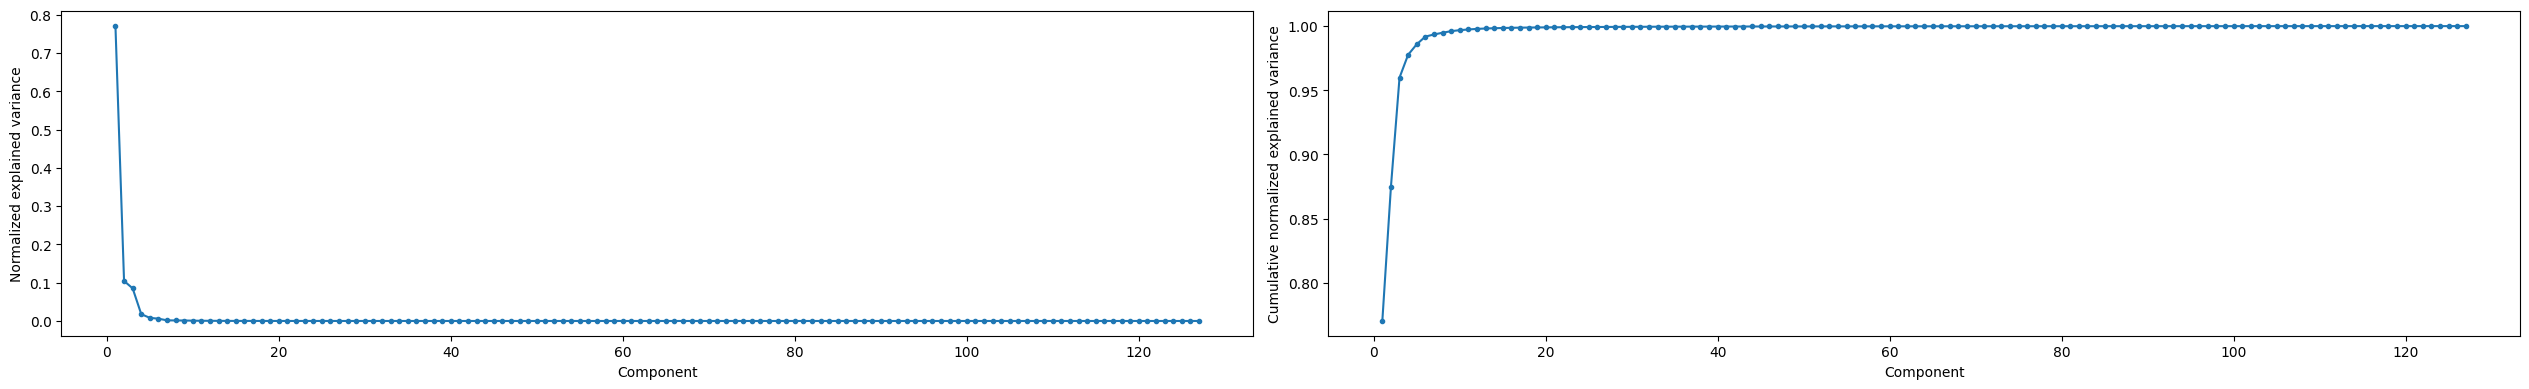

In [3]:
preprocessed = hmp.preprocessing.Standard(epoch_data) # this will ask you to choose the number of components to keep, I chose 6 for 99% variance explained

## 3) fit the data to HMP Model
The main hyperparameter that we want to optimize is the number of events in the HMP model. 

### 3.1)  HMP cumulative fitting 

Here the algoritm start with one event at sample one and the EM algorithm then converges to the first local maximum in the data. Then, fit a two-event model, reusing the first event’s optimal parameters and initializing the second event just after the first. EM again finds the next best event. his process continues incrementally, adding events one by one, until reach the liklihood threshold

In [4]:
# Defining the expected HMP pattern
event_properties = hmp.patterns.HalfSine.create_expected(sfreq=epoch_data.sfreq)
# Performing the crosscorrelation between the preprocessed data and the expected pattern
trial_data = hmp.trialdata.TrialData.from_preprocessed(preprocessed=preprocessed, pattern=event_properties.template)
# bulding the cumulative model
model = hmp.models.CumulativeMethod(event_properties)
# fitting and transforming the data
ll_cumulative, estimates_cumulative = model.fit_transform(trial_data)

  0%|          | 0/220 [00:00<?, ?it/s]

Transition event 1 found around time 58.59375
Transition event 2 found around time 351.5625
Transition event 3 found around time 546.875
Transition event 4 found around time 820.3125

All events found, refitting final combination.
Estimating 4 events model


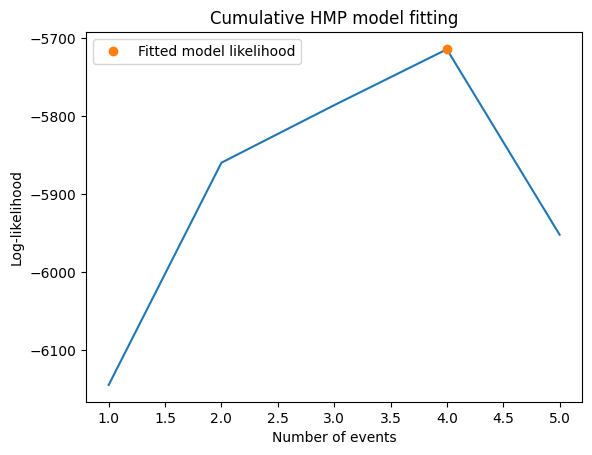

In [11]:
import numpy as np
import matplotlib.pyplot as plt
model_cumulative = model
cumulative_res = np.array([np.array([model_cumulative.submodels[x].n_events, model_cumulative.submodels[x].lkhs[0]]) for x in model_cumulative.submodels])
plt.plot(cumulative_res[:,0], cumulative_res[:,1])
plt.plot(model_cumulative.final_model.n_events, model_cumulative.final_model.lkhs, 'o', label='Fitted model likelihood')
plt.xlabel('Number of events')
plt.ylabel('Log-likelihood')
plt.title('Cumulative HMP model fitting')
plt.legend()

##### plot the events topomap  at their peak average over all trials

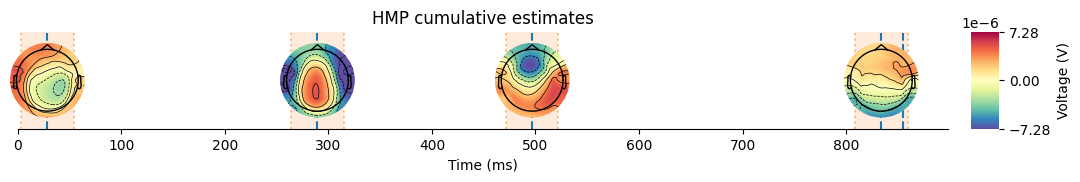

In [14]:
info = mne.io.read_info(subj_files[0], verbose=True)
plot = hmp.visu.plot_topo_timecourse(epoch_data, estimates_cumulative, info, as_time=True, title='HMP cumulative estimates',)


### 3.2)  HMP eliminative fitting

in this approach, firts, we compute the maximum number of events possible (saying how many evenet with minimum duration ( the half sine template) can have in a 2 seconds epoch (max rt) ). we start with the maximum value and iterate down to the minimum number of events(1). by taking differnt starting initializations, we ensure that the parameter space has been properly explored

In [ ]:
# Defining the expected HMP pattern
event_properties = hmp.patterns.HalfSine.create_expected(sfreq=epoch_data.sfreq)
# Performing the crosscorrelation between the preprocessed data and the expected pattern
trial_data = hmp.trialdata.TrialData.from_preprocessed(preprocessed=preprocessed, pattern=event_properties.template)
# bulding the cumulative model

model = hmp.models.eliminative.EliminativeMethod(event_properties)
# fitting and transforming the data
likelihoods , estimates_elim = model.fit_transform(trial_data, cpus=4)  


Estimating all solutions for maximal number of events (10)
Estimating all solutions for 9 events


  0%|          | 0/10 [00:00<?, ?it/s]

Estimating all solutions for 8 events


  0%|          | 0/9 [00:00<?, ?it/s]

Estimating all solutions for 7 events


  0%|          | 0/8 [00:00<?, ?it/s]

Estimating all solutions for 6 events


  0%|          | 0/7 [00:00<?, ?it/s]

Estimating all solutions for 5 events


  0%|          | 0/6 [00:00<?, ?it/s]

Estimating all solutions for 4 events


  0%|          | 0/5 [00:00<?, ?it/s]

Estimating all solutions for 3 events


  0%|          | 0/4 [00:00<?, ?it/s]

Estimating all solutions for 2 events


  0%|          | 0/3 [00:00<?, ?it/s]

Estimating all solutions for 1 events


  0%|          | 0/2 [00:00<?, ?it/s]

Text(0, 0.5, 'Log-likelihood')

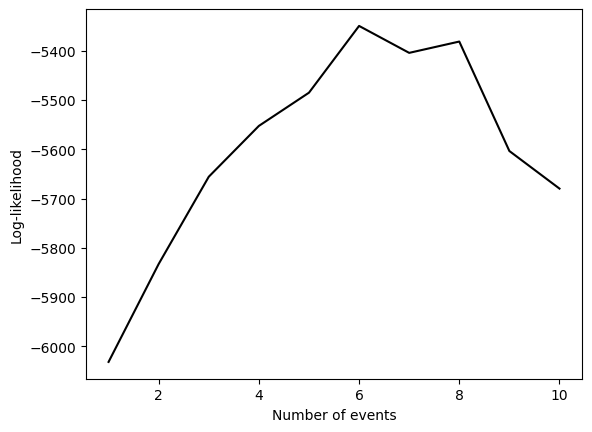

In [ ]:
n_events_backward = [model.submodels[i].n_events for i in model.submodels]
plt.plot(n_events_backward, likelihoods, 'k')
plt.xlabel('Number of events')
plt.ylabel('Log-likelihood')

In [20]:
# load the model
import pickle
with open(os.path.join(data_dir, 'estimates_elim.pkl'), 'rb') as f:
    estimates_elim = pickle.load(f)

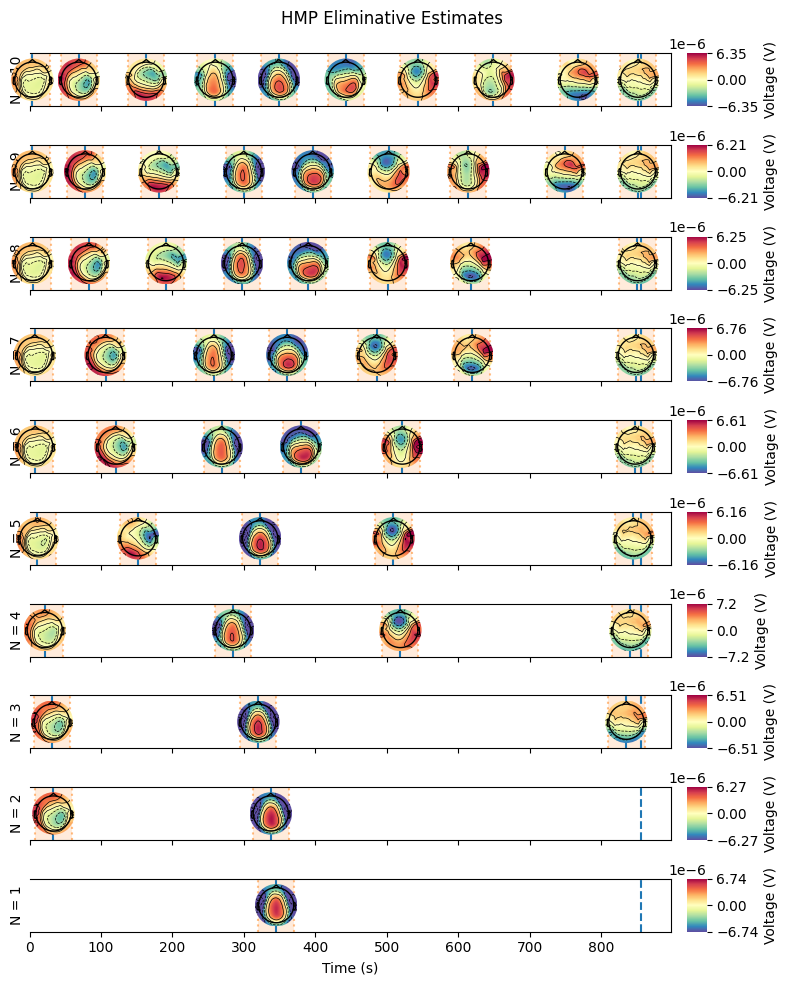

In [23]:

import matplotlib.pyplot as plt
info = mne.io.read_info(subj_files[0], verbose=True)
fig, axes = plt.subplots(len(estimates_elim.n_events), 1, figsize=(8, len(estimates_elim.n_events)), sharex=True)
for ax, n_event in zip(axes, estimates_elim.n_events):
    hmp.visu.plot_topo_timecourse(epoch_data, estimates_elim.sel(n_events=n_event), info, sensors=False, magnify=1, ax=ax, colorbar=True, as_time=True)
    ax.set_ylabel(f"N = {n_event.values}")
plt.xlabel('Time (s)')
plt.suptitle('HMP Eliminative Estimates')

plt.tight_layout()

In [13]:
# save the model estimates
with open(os.path.join(data_dir, 'estimates_elim.pkl'), 'wb') as f:
    pickle.dump(estimates_elim, f)